In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# cd /Users/allywang/Desktop/work/S2026/FACT

# python train_cutrun_cnn.py \
#   --fasta /path/to/mm10.fa \
#   --bigwig data/bws_for_predictor/SPT16_4D_2HdTAG_Sox2_S46_1_120_sorted.bw \
#   --chrom chr3 \
#   --window-size 10000 \
#   --stride 10000 \
#   --signal-bins 100 \
#   --batch-size 32 \
#   --epochs 10 \
#   --output-model cutrun_cnn.pt

In [ ]:
import sys 
sys.path.append('../src')

from cnn import * 
from datas import * 

In [26]:
bigwig_path = '../data/bws_for_predictor/SPT16_4D_2HdTAG_Sox2_S46_1_120_sorted.bw'
fasta_path = '../data/GRCm38.primary_assembly.genome.fa'
chrom = 'chr3'
window_size = 1000
stride = 1000
signal_bins = 100
batch_size = 256
epochs = 100
lr = 1e-3
device = 'cpu'
weight_decay = 1e-4
patience = 100

In [27]:
dataset = SequenceBigWigDataset(
    fasta_path=str(fasta_path),
    bigwig_path=str(bigwig_path),
    signal_bins=signal_bins,
    chrom=chrom,
    window_size=window_size,
    stride=stride
)

In [28]:
len(dataset)

80346

In [29]:
x, y= next(iter(dataset))

x.shape, y.shape

(torch.Size([4, 1000]), torch.Size([100]))

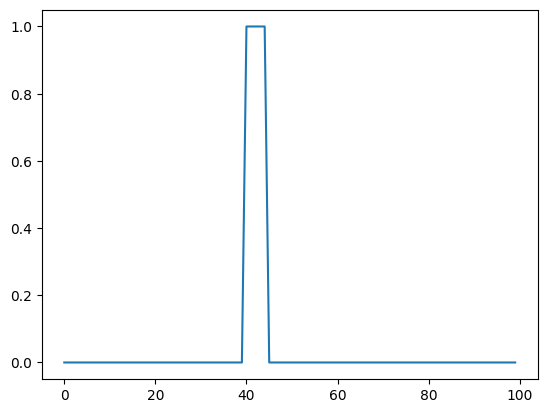

In [31]:
import matplotlib.pyplot as plt
plt.plot(y.numpy())

In [35]:
config = TrainConfig(
    lr=lr,
    weight_decay=weight_decay,
    epochs=epochs,
    device=device,
    patience=patience
)

In [36]:
# reduce training data to see if loss hits zero
dataset.intervals = dataset.intervals[:100]

In [37]:
model = train_cnn_regressor(
    dataset=dataset,
    batch_size=batch_size,
    config=config,
)

Epoch 1/100 - train loss: 0.7107, val loss: 0.6811
Epoch 2/100 - train loss: 0.3551, val loss: 0.6674
Epoch 3/100 - train loss: 0.3681, val loss: 0.6532
Epoch 4/100 - train loss: 0.3919, val loss: 0.6398
Epoch 5/100 - train loss: 0.3628, val loss: 0.6295
Epoch 6/100 - train loss: 0.2884, val loss: 0.6237
Epoch 7/100 - train loss: 0.2701, val loss: 0.6179
Epoch 8/100 - train loss: 0.2360, val loss: 0.6126
Epoch 9/100 - train loss: 0.2143, val loss: 0.6089
Epoch 10/100 - train loss: 0.1843, val loss: 0.6082
Epoch 11/100 - train loss: 0.1581, val loss: 0.6104
Epoch 12/100 - train loss: 0.1374, val loss: 0.6150
Epoch 13/100 - train loss: 0.1215, val loss: 0.6215
Epoch 14/100 - train loss: 0.1109, val loss: 0.6298
Epoch 15/100 - train loss: 0.1038, val loss: 0.6395
Epoch 16/100 - train loss: 0.0977, val loss: 0.6492
Epoch 17/100 - train loss: 0.0921, val loss: 0.6560
Epoch 18/100 - train loss: 0.0874, val loss: 0.6583
Epoch 19/100 - train loss: 0.0831, val loss: 0.6598
Epoch 20/100 - train 

In [ ]:
import torch
import time
from pathlib import Path

date = time.strftime("%Y%m%d_%H")
output_model_path = Path(f'../models/seq_bpnet_{date}.pt')

save_model(model, output_model_path)
print(f"Saved trained model (config + state_dict) to: {output_model_path}")


In [9]:
output_model_path = '../models/seq_6HdTAG_20260129_14.pt'
model = load_model(output_model_path, device='cpu')

In [10]:
from torch.utils.data import DataLoader

loader = DataLoader(
    dataset,
    batch_size=batch_size,
    shuffle=False,  # shuffles order every epoch
    num_workers=1
)


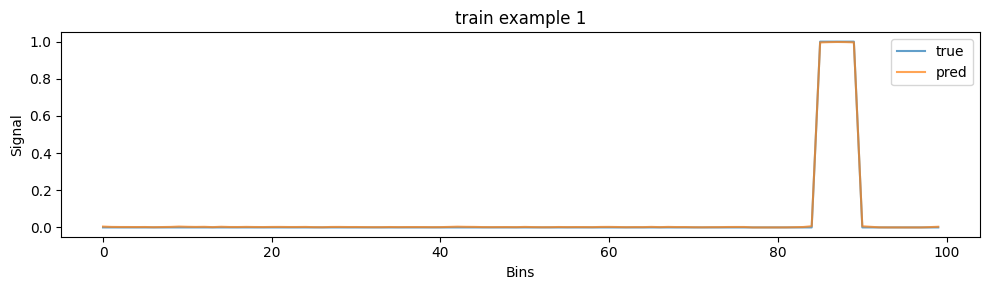

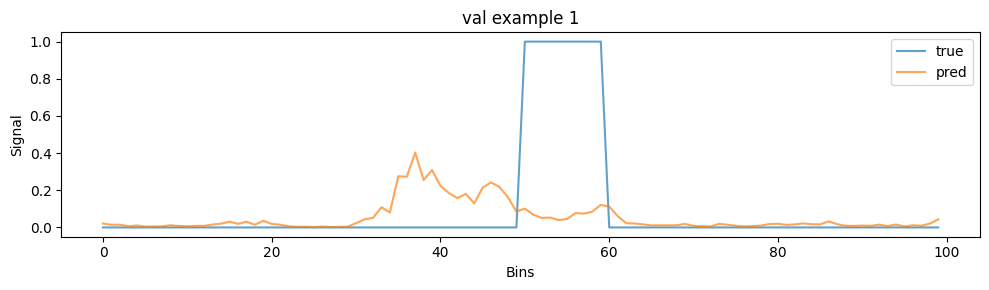

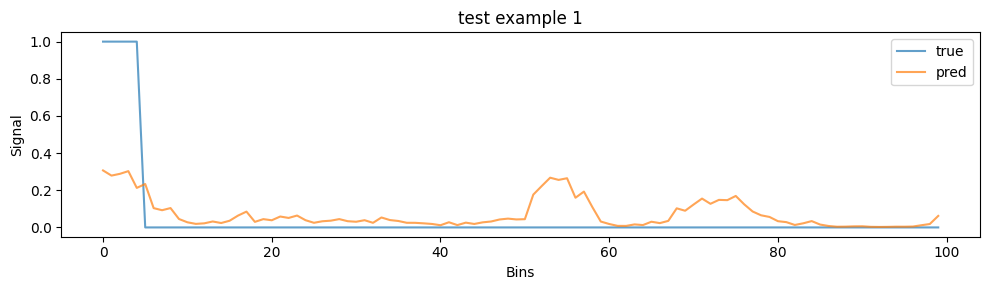

In [38]:
visualize_split_predictions(
    model,
    device='cpu',
    n_examples_per_split=1,
    # loader=loader
)